<a href="https://colab.research.google.com/github/davidwan08/Mushroom-Classification-Modeling-and-Analysis-Project/blob/main/Mushroom_Classification_Project_Data_Exploration_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Overview**

Source: https://www.kaggle.com/datasets/uciml/mushroom-classification

### Context
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

### Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

- Time period: Donated to UCI ML 27 April 1987

### Inspiration
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?

# **Data Dictionary**

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s (6 distinct values)
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s (4 distinct values)
- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y (10 distinct values)
- bruises: bruises=t, no=f (2 distinct values)
- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s (9 distinct values)
- gill-attachment: attached=a, descending=d, free=f, notched=n (4 distinct values)
- gill-spacing: close=c, crowded=w, distant=d (3 distinct values)
- gill-size: broad=b, narrow=n (2 distinct values)
- gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y (12 distinct values)
- stalk-shape: enlarging=e, tapering=t (2 distinct values)
- stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? (7 distinct values)
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s (4 distinct values)
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s (4 distinct values)
- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y (9 distinct values)
- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y (9 distinct values)
- veil-type: partial=p, universal=u (2 distinct values)
- veil-color: brown=n, orange=o, white=w, yellow=y (4 distinct values)
- ring-number: none=n, one=o, two=t (3 distinct values)
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z (8 distinct values)
- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y (9 distinct values)
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y (6 distinct values)
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d (7 distinct values)

# **Library Preparation**

In [110]:
# Imports the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- In case Dython is not installed, the following code block will install Dython in order to perform correlation heatmap generation with this dataset.
- Note that this may require a restart of the runtime to get the remainder of code to work!
- Dython website: http://shakedzy.xyz/dython/

In [111]:
# Installs Dython into Python.
# Note: Will prompt a runtime restart if applicable!
# !pip install dython

In [112]:
# Imports the necessary Dython libraries.
from dython.nominal import associations

# **Data Loading and Data Overview**

In [113]:
# Mounting of data from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Let's examine the dataset in depth.

In [114]:
# Load the mushroom dataset into Python.
mushroom_file = '/content/drive/MyDrive/Coding Dojo/Machine Learning/mushrooms.csv'
mushrooms_df = pd.read_csv(mushroom_file)
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [115]:
# Get an overview of the mushroom dataset.
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [116]:
# Check for duplicated entries in the dataset.
mushrooms_df.duplicated().sum()

0

In [117]:
# Check for missing values in each column.
mushrooms_df.isna().sum()

class                0
cap-shape            0
cap-surface          0
cap-color            0
bruises              0
                    ..
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
Length: 23, dtype: int64

In [118]:
# Check the number of rows and columns in this dataset.
mushrooms_df.shape

(8124, 23)

- So far, no duplicated entries or missing values in the dataset.
- The target variable is the classification of the mushroom as either edible or poisonous ('class' column). Therefore, this will be a classification problem.
- There are 8124 entries and 22 features in this dataset.
- I do not really see much data cleaning issues involved with imputations and datatype issues. However, there are a lot of features involved with this dataset, so there may be a potential for multicollinearity as we perform our modeling and classification predictions.
- Also, there may be some columns that may have to be reclassified based on nominal or ordinal information. This will have to be addressed prior to validation splitting.
- All in all, this is a very interesting dataset that intrigues me a lot.

# **Data Cleaning**

- We have previously confirmed that there are no missing values or duplicated entries in the dataset.
- All of the columns seem to be object datatypes, based on what values are defined in the data dictionary.
- Now, let's delve further into what values lie within the columns.
- Let's get a unique value count for each column in the dataset.
- Note that some of the values in the data dictionary may not show up in this dataset! As long as the unique value count for each column is less than or equal to the dataset, the dataset should be consistent.
- Source: https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [119]:
# Determine the number of unique values in each column of the dataset.
n = mushrooms_df.nunique(axis=0)

# I have set display.max_rows option to None to expand values completely.
pd.set_option('display.max_rows', None)

# Print a list of columns and the corresponding unique values.
print("No.of.unique values in each column :\n",n)

# After completion of printing column values,
# I have set display.max_rows option to default of 10.
pd.set_option('display.max_rows', 10)

No.of.unique values in each column :
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [120]:
# Lets create an index to help our analysis with categorical categories.
# str_cols contains the columns in the object datatype.

dtypes = mushrooms_df.dtypes
str_cols = dtypes[dtypes == 'object'].index
str_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [121]:
# Let's go ahead and print out all the values associated with those columns.
# I have set display.max_rows option to None to expand values completely.
pd.set_option('display.max_rows', None)
for col in str_cols:
  print(f"- Column= {col}")
  print(mushrooms_df[col].value_counts(dropna=False))
  print('\n\n')

# After completion of printing column values,
# I have set display.max_rows option to default of 10.
pd.set_option('display.max_rows', 10)

- Column= class
e    4208
p    3916
Name: class, dtype: int64



- Column= cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



- Column= cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



- Column= cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



- Column= bruises
f    4748
t    3376
Name: bruises, dtype: int64



- Column= odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



- Column= gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



- Column= gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



- Column= gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



- Column= gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r 

- Took a lot of time to cross-reference these unique values, but all the columns have the correct values within each column.
- This dataset is very clean! Saves me all the hard work of doing so!
- Lastly, let's check the dataset target balance and see how balanced the dataset is.

In [122]:
# Check the value counts of the class column.
mushrooms_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [123]:
# Check the value counts of the class column with normalization.
mushrooms_df['class'].value_counts(normalize = True)

e    0.517971
p    0.482029
Name: class, dtype: float64

- The dataset is fairly balanced, which should make exploration and modeling analysis much more consistent.

# **Data Exploration**

## **Dataset Splitting**

- Let's split the dataset into the poisonous mushrooms and the edible mushrooms for exploratory purposes.

In [124]:
# Create the edible mushroom subset.
edible_df = mushrooms_df.loc[mushrooms_df['class'] == 'e', :]
edible_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [125]:
# Create the poisonous mushroom subset.
poisonous_df = mushrooms_df.loc[mushrooms_df['class'] == 'p', :]
poisonous_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g


## **Univariate Visual 1: Mushrooms by Ring Count**

- First, let's get the mushroom count for each subset based on number of rings.

In [126]:
# Find the unique values in the rings column of the original dataset.
rings_list = mushrooms_df['ring-number'].unique()
rings_list

array(['o', 't', 'n'], dtype=object)

- Since ring numbers is an ordinal feature, I will reorganize the order of the list in ascending order.
- Source for reordering list: https://www.adamsmith.haus/python/answers/how-to-reorder-a-list-in-python#:~:text=Use%20the%20syntax%20%5Blist%5Bi,element%20to%20get%20from%20list%20.



In [127]:
# Creates an order list, then reorganizes the rings list based on order in order list.
rings_order = [2,0,1]
rings_list = [rings_list[i] for i in rings_order]
rings_list

['n', 'o', 't']

- Let's get the mushroom counts based on ring number for each subset.

In [128]:
# Create counts on number of poisonous entries with the corresponding ring numbers.
# I will create a for loop to accomplish this.
poisonous_rings = []
for x in rings_list:
  rings = len(poisonous_df.loc[poisonous_df['ring-number'] == x,:])
  print("Number of poisonous mushrooms with", x, "rings:", rings)
  poisonous_rings.append(rings)

# Total count of poisonous mushrooms
print("Total poisonous mushroom count:", sum(poisonous_rings))

Number of poisonous mushrooms with n rings: 36
Number of poisonous mushrooms with o rings: 3808
Number of poisonous mushrooms with t rings: 72
Total poisonous mushroom count: 3916


In [129]:
# Create counts on number of edible entries with the corresponding ring numbers.
# I will create a for loop to accomplish this.
edible_rings = []
for x in rings_list:
  rings = len(edible_df.loc[edible_df['ring-number'] == x,:])
  print("Number of edible mushrooms with", x, "rings:", rings)
  edible_rings.append(rings)

# Total count of edible mushrooms
print("Total edible mushroom count:", sum(edible_rings))

Number of edible mushrooms with n rings: 0
Number of edible mushrooms with o rings: 3680
Number of edible mushrooms with t rings: 528
Total edible mushroom count: 4208


- Next, let's plot the barplot comparing the 2 mushroom categories.
- Source for creating barplots: https://pythonspot.com/matplotlib-bar-chart/
- Source for changing plot size: https://pythonguides.com/matplotlib-increase-plot-size/#:~:text=To%20change%20the%20figure%20size,use%20the%20show()%20function.

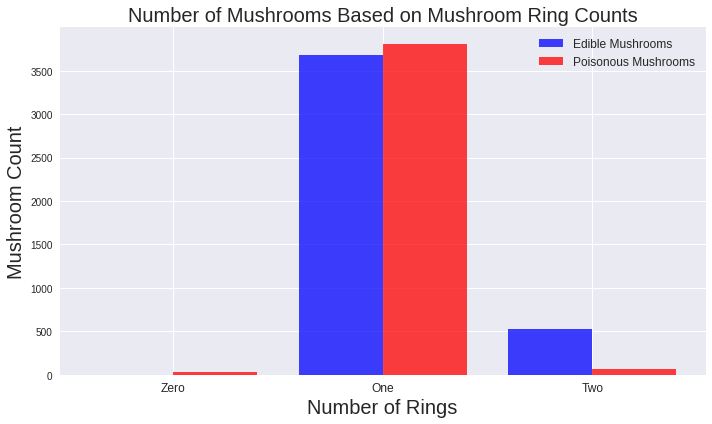

In [130]:
# Create data to plot in the barplot.
rings_groups = len(rings_list)

# Create the barplot using the aforementioned values obtained from entry counts.
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(rings_groups)
bar_width = 0.40
opacity = 0.75

rects1 = plt.bar(index, edible_rings, bar_width,
alpha=opacity,
color='b',
label='Edible Mushrooms')

rects2 = plt.bar(index + bar_width, poisonous_rings, bar_width,
alpha=opacity,
color='r',
label='Poisonous Mushrooms')

plt.xlabel('Number of Rings', size = 20)
plt.ylabel('Mushroom Count', size = 20)
plt.title('Number of Mushrooms Based on Mushroom Ring Counts', size = 20)
plt.xticks(index + bar_width * 0.5, ('Zero', 'One', 'Two'), size = 12)
plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

- Based on the diagram, it seems that mushrooms that have no rings are all classified as poisonous!
- Mushrooms with 1 ring seem to have an even split between edible and poisonous types.
- Lastly, the majority of mushrooms with 2 rings seem to be edible, but there are a few poisonous ones in that category.

## **Univariate Visual 2: Mushrooms by Habitat**

- Next, I would like to examine how the mushrooms types are affected by the habitat they are in.

In [131]:
# Find the unique values in the habitat column of the original dataset.
habitat_list = mushrooms_df['habitat'].unique()
habitat_list

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

- Let's get mushroom count for the different habitats from each subset.

In [132]:
# Create counts on number of poisonous entries with the corresponding habitat.
# I will create a for loop to accomplish this.
poisonous_habitat = []
for x in habitat_list:
  habitat = len(poisonous_df.loc[poisonous_df['habitat'] == x,:])
  print("Number of poisonous mushrooms with", x, "habitat:", habitat)
  poisonous_habitat.append(habitat)

# Total count of poisonous mushrooms
print("Total poisonous mushroom count:", sum(poisonous_habitat))

Number of poisonous mushrooms with u habitat: 272
Number of poisonous mushrooms with g habitat: 740
Number of poisonous mushrooms with m habitat: 36
Number of poisonous mushrooms with d habitat: 1268
Number of poisonous mushrooms with p habitat: 1008
Number of poisonous mushrooms with w habitat: 0
Number of poisonous mushrooms with l habitat: 592
Total poisonous mushroom count: 3916


In [133]:
# Create counts on number of edible entries with the corresponding habitat.
# I will create a for loop to accomplish this.
edible_habitat = []
for x in habitat_list:
  habitat = len(edible_df.loc[edible_df['habitat'] == x,:])
  print("Number of edible mushrooms with", x, "habitat:", habitat)
  edible_habitat.append(habitat)

# Total count of edible mushrooms
print("Total edible mushroom count:", sum(edible_habitat))

Number of edible mushrooms with u habitat: 96
Number of edible mushrooms with g habitat: 1408
Number of edible mushrooms with m habitat: 256
Number of edible mushrooms with d habitat: 1880
Number of edible mushrooms with p habitat: 136
Number of edible mushrooms with w habitat: 192
Number of edible mushrooms with l habitat: 240
Total edible mushroom count: 4208


- Let's plot the barplot comparing mushroom types based on habitat.
- Just for reference from the data dictionary:
  - habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d (7 distinct values)

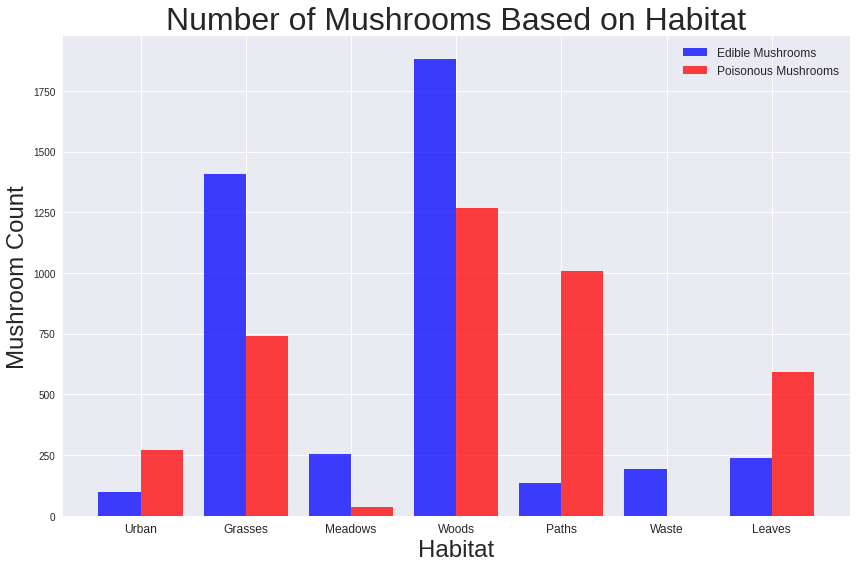

In [134]:
# Create data to plot in the barplot.
habitat_groups = len(habitat_list)

# Create the barplot using the aforementioned values obtained from entry counts.
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(habitat_groups)
bar_width = 0.40
opacity = 0.75

rects1 = plt.bar(index, edible_habitat, bar_width,
alpha=opacity,
color='b',
label='Edible Mushrooms')

rects2 = plt.bar(index + bar_width, poisonous_habitat, bar_width,
alpha=opacity,
color='r',
label='Poisonous Mushrooms')

plt.xlabel('Habitat', size = 24)
plt.ylabel('Mushroom Count', size = 24)
plt.title('Number of Mushrooms Based on Habitat', size = 32)
plt.xticks(index + bar_width * 0.5, ('Urban', 'Grasses', 'Meadows',
                                     'Woods', 'Paths', 'Waste',
                                     'Leaves'), size = 12)
plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

- Based on the barchart, it seems that a majority of both edible and poisonous mushrooms reside in the woods habitat.
- The majority of mushrooms in the urban, paths, and leaves are poisonous, whereas the majority of mushrooms in the grasses, meadows, woods, and waste are edible.
- I was surprised at the waste habitat, as I was expecting mushrooms to be poisonous in that habitat.
- I was not surprised at the urban, paths, and leaves habitats, as those tend to be located in man-made and synthetic areas where they are prone to more chemical and air-bourne pollutants.

## **Univariate Visual 3: Mushrooms by Cap Shape**

- Lastly, I would like to examine how cap shape affects whether a mushroom is edible or poisonous.
- Let's create a list of cap shape values.

In [135]:
# Find the unique values in the habitat column of the original dataset.
capshape_list = mushrooms_df['cap-shape'].unique()
capshape_list

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

- Let's use for loops to get mushrooms counts based on cap shape in each subset.

In [136]:
# Create counts on number of poisonous entries with the corresponding cap shape.
# I will create a for loop to accomplish this.
poisonous_capshape = []
for x in capshape_list:
  capshape = len(poisonous_df.loc[poisonous_df['cap-shape'] == x,:])
  print("Number of poisonous mushrooms with", x, "capshape:", capshape)
  poisonous_capshape.append(capshape)

# Total count of poisonous mushrooms
print("Total poisonous mushroom count:", sum(poisonous_capshape))

Number of poisonous mushrooms with x capshape: 1708
Number of poisonous mushrooms with b capshape: 48
Number of poisonous mushrooms with s capshape: 0
Number of poisonous mushrooms with f capshape: 1556
Number of poisonous mushrooms with k capshape: 600
Number of poisonous mushrooms with c capshape: 4
Total poisonous mushroom count: 3916


In [137]:
# Create counts on number of edible entries with the corresponding cap shape.
# I will create a for loop to accomplish this.
edible_capshape = []
for x in capshape_list:
  capshape = len(edible_df.loc[edible_df['cap-shape'] == x,:])
  print("Number of edible mushrooms with", x, "capshape:", capshape)
  edible_capshape.append(capshape)

# Total count of edible mushrooms
print("Total edible mushroom count:", sum(edible_capshape))

Number of edible mushrooms with x capshape: 1948
Number of edible mushrooms with b capshape: 404
Number of edible mushrooms with s capshape: 32
Number of edible mushrooms with f capshape: 1596
Number of edible mushrooms with k capshape: 228
Number of edible mushrooms with c capshape: 0
Total edible mushroom count: 4208


- Let's plot the barplot comparing cap shapes of edible and poisonous mushrooms.
- Just for reference from the data dictionary:
  - cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s (6 distinct values)

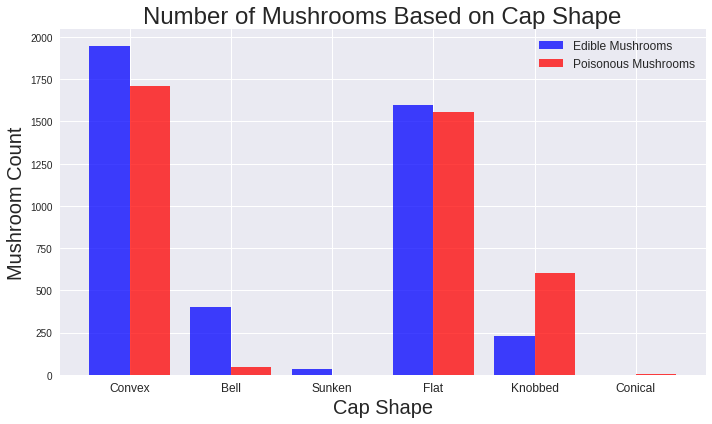

In [138]:
# Create data to plot in the barplot.
capshape_groups = len(capshape_list)

# Create the barplot using the aforementioned values obtained from entry counts.
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(capshape_groups)
bar_width = 0.40
opacity = 0.75

rects1 = plt.bar(index, edible_capshape, bar_width,
alpha=opacity,
color='b',
label='Edible Mushrooms')

rects2 = plt.bar(index + bar_width, poisonous_capshape, bar_width,
alpha=opacity,
color='r',
label='Poisonous Mushrooms')

plt.xlabel('Cap Shape', size = 20)
plt.ylabel('Mushroom Count', size = 20)
plt.title('Number of Mushrooms Based on Cap Shape', size = 24)
plt.xticks(index + bar_width * 0.5, ('Convex', 'Bell', 'Sunken',
                                     'Flat', 'Knobbed', 'Conical'),
                                     size = 12)
plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

- Based on the barchart, it seems that the majority of knobbed mushrooms are poisonous, and all conical mushrooms are classified as poisonous as well.
- The majority of bell and sunken shapes are edible, whereas convex and flat share about a 50-50 split on the mushroom types.

## **Correlation Heatmap**

- We will use associations method from the Dython library to create and map a correlation heatmap comparing the categorical variables with each other in the original dataset.

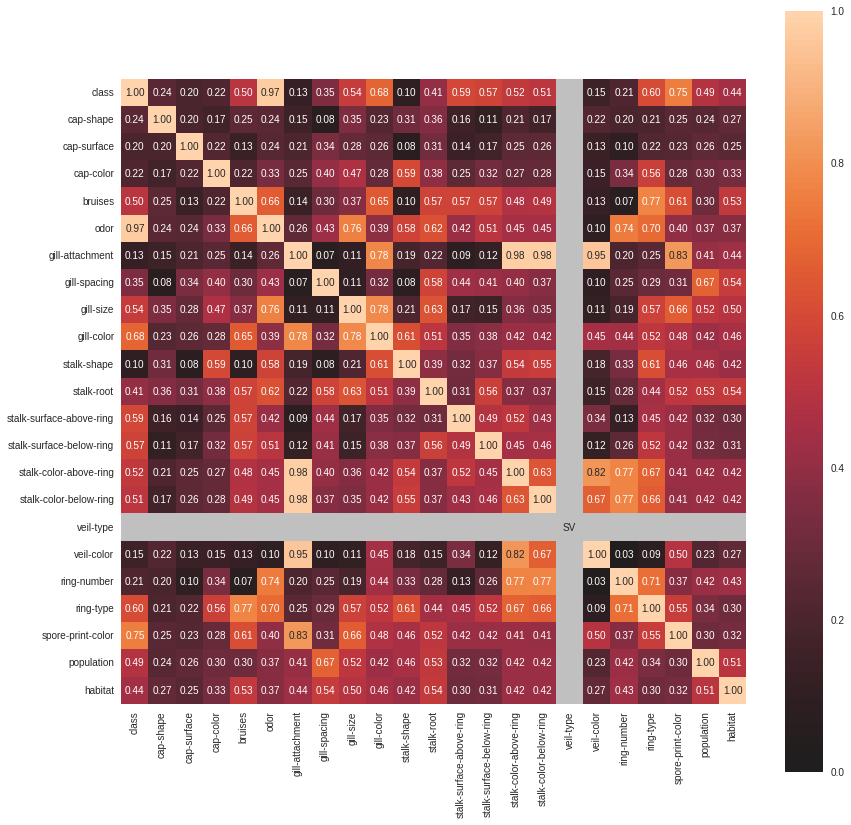

{'ax': <AxesSubplot:>,
 'corr':                       class  cap-shape  cap-surface  cap-color   bruises  \
 class              1.000000   0.244330     0.195997   0.215889  0.501188   
 cap-shape          0.244330   1.000000     0.202242   0.168221  0.254415   
 cap-surface        0.195997   0.202242     1.000000   0.222841  0.133004   
 cap-color          0.215889   0.168221     0.222841   1.000000  0.215101   
 bruises            0.501188   0.254415     0.133004   0.215101  1.000000   
 ...                     ...        ...          ...        ...       ...   
 ring-number        0.214212   0.197883     0.097278   0.336128  0.069373   
 ring-type          0.602900   0.206749     0.223669   0.557217  0.768218   
 spore-print-color  0.752036   0.249101     0.230539   0.284714  0.611623   
 population         0.486775   0.240074     0.260952   0.304085  0.299568   
 habitat            0.439323   0.269842     0.249577   0.325199  0.530257   
 
                        odor  gill-attachme

In [139]:
# Use Dython to generate a correlation heatmap between the categorical variables.
associations(mushrooms_df, figsize = (14,14))

- In terms of correlation with respect to the mushroom class, the 3 features that exhibit the strongest correlation are as follows:
  - Odor exhibits the strongest correlation at 0.97.
  - Spore print color exhibits the next strongest correlation at 0.75.
  - Ring type exhibits a moderate correlation at 0.60.
- In terms of correlation with respect to features themselves, the 3 sets of features that exhibit the strongest correlation are as follows:
  - Gill attachment and stalk color above ring exhibit the strongest correlation at 0.98.
  - Gill attachment and stalk color below ring exhibit a matching correlation with the strongest one at 0.98.
  - Gill attachment and veil color exhibit the next strongest correlation at 0.95.
- Overall, I would definitely say that the mushroom odor serves as the best indicator of whether a mushroom is edible or poisonous, if there were only one feature I would use to make that class determination.

# **Poisonous Mushroom Multivariate Correlation Analysis**

- For multivariate correlation of poisonous mushrooms, I would like to examine what specific clusters of poisonous mushrooms help distinguish their nature to help us more readily identify them.

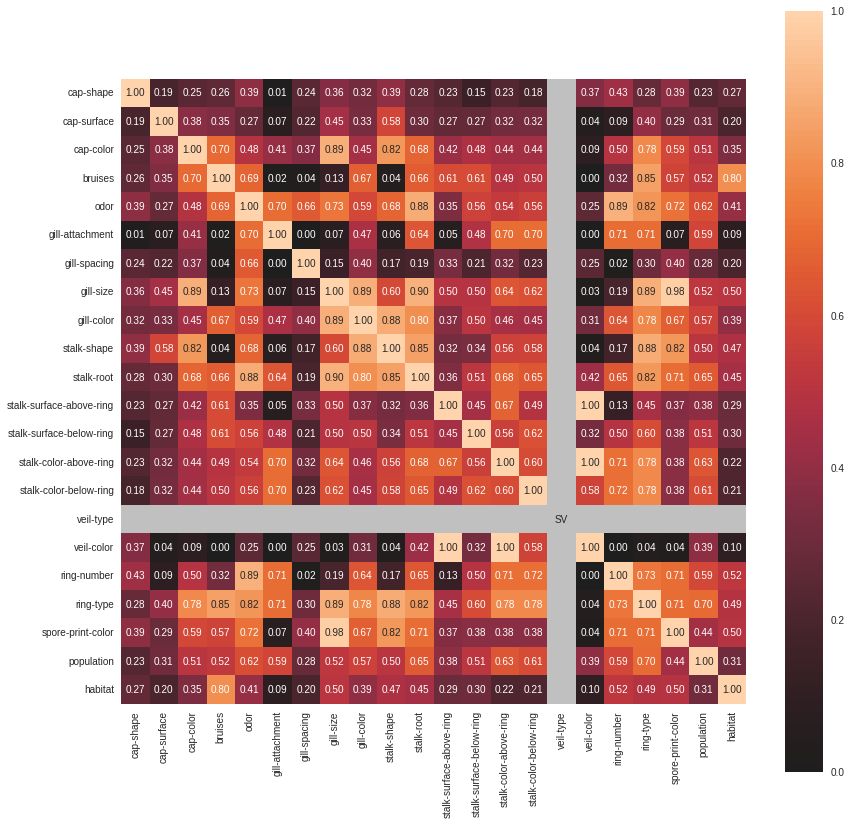

{'ax': <AxesSubplot:>,
 'corr':                    cap-shape  cap-surface  cap-color   bruises      odor  \
 cap-shape           1.000000     0.192744   0.249515  0.262726  0.385544   
 cap-surface         0.192744     1.000000   0.380685  0.352266  0.274523   
 cap-color           0.249515     0.380685   1.000000  0.702001  0.484747   
 bruises             0.262726     0.352266   0.702001  1.000000  0.686973   
 odor                0.385544     0.274523   0.484747  0.686973  1.000000   
 ...                      ...          ...        ...       ...       ...   
 ring-number         0.433301     0.086370   0.499699  0.315846  0.891679   
 ring-type           0.281725     0.402951   0.782830  0.848247  0.817390   
 spore-print-color   0.388659     0.290499   0.591576  0.570548  0.721166   
 population          0.226859     0.312158   0.505763  0.523989  0.616367   
 habitat             0.267348     0.201157   0.346213  0.800671  0.413954   
 
                    gill-attachment  gill-s

In [140]:
# Drop the class column for correlation analysis purposes.
modified_p = poisonous_df.drop(columns = 'class')

# Generate a correlation heatmap among poisonous categorical variables.
associations(modified_p, figsize = (14,14))

- Based on the poisonous mushroom correlation heatmap, there are a few sets of features that would benefit us in the classification of unknown mushrooms as poisonous.
  - Veil color and stalk surface above ring seem to have perfect correlation of 1.
  - Veil color and stalk color above ring seem to also have perfect correlation of 1 as well.
  - Spore print color and gill size has very strong correlation of 0.98.
- These features come to show that we can easily distinguish poisonous mushrooms by examining how these sets of features serve as an identification device for doing so. For example, veil color and stalk color could go hand in hand to easily distinguish the poisonous mushrooms.

# **Edible Mushroom Multivariate Correlation Analysis**

- I will do the same thing with edible mushrooms and examine the correlation values between the different features.

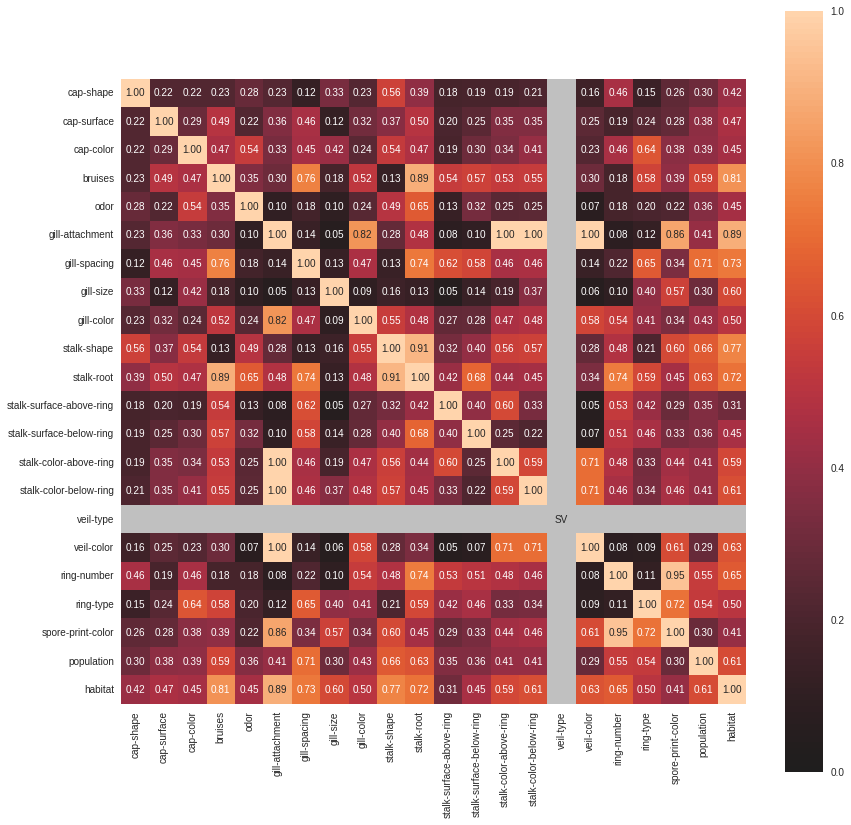

{'ax': <AxesSubplot:>,
 'corr':                    cap-shape  cap-surface  cap-color   bruises      odor  \
 cap-shape           1.000000     0.219278   0.221679  0.225623  0.283397   
 cap-surface         0.219278     1.000000   0.294869  0.494147  0.220547   
 cap-color           0.221679     0.294869   1.000000  0.465519  0.542213   
 bruises             0.225623     0.494147   0.465519  1.000000  0.351779   
 odor                0.283397     0.220547   0.542213  0.351779  1.000000   
 ...                      ...          ...        ...       ...       ...   
 ring-number         0.458580     0.193693   0.460140  0.181559  0.182244   
 ring-type           0.146834     0.239641   0.635576  0.575702  0.197143   
 spore-print-color   0.264279     0.279784   0.379914  0.393079  0.216449   
 population          0.301069     0.384007   0.394783  0.585311  0.359510   
 habitat             0.416757     0.467122   0.447970  0.810256  0.450385   
 
                    gill-attachment  gill-s

In [141]:
# Drop the class column for correlation analysis purposes.
modified_e = edible_df.drop(columns = 'class')

# Generate a correlation heatmap among edible categorical variables.
associations(modified_e, figsize = (14,14))

- Based on the edible mushroom correlation heatmap, there are a few sets of features that would benefit us in the classification of unknown mushrooms as edible.
  - Veil color and stalk surface above ring seem to have perfect correlation of 1.
  - Veil color and stalk color above ring seem to also have perfect correlation of 1 as well.
  - Veil color and stalk color below ring also has perfect correlation of 1.
- These features come to show that we can easily distinguish edible mushrooms by examining how these sets of features serve as an identification device for doing so. For example, veil color and stalk color could go hand in hand to easily distinguish the edible mushrooms.

# **Dataset Scaling for KMeans Clustering**

- In order to cluster the data and see how the dataset is clustered, we will need to encode the categorical values and perform any scaling as necessary.
- Let's import some libraries here.

In [142]:
# Import additional libraries as necessary.
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

- Let's perform the ordinal encoding.

In [160]:
# Perform ordinal encoding of ring-number column for the original dataset.
mushrooms_df['ring-number'].replace({"n": 0, "o": 1, "t": 2}, inplace=True)
print(mushrooms_df['ring-number'].value_counts())

1    7488
2     600
0      36
Name: ring-number, dtype: int64


- After the ordinal encoding, let's split off the dataset once more based on poisonous vs edible mushrooms.

In [161]:
# Create the edible mushroom subset after ordinal encoding.
edible_df2 = mushrooms_df.loc[mushrooms_df['class'] == 'e', :]
edible_df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,1,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,1,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,1,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,1,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,1,p,k,n,m


In [162]:
# Create the poisonous mushroom subset after ordinal encoding.
poisonous_df2 = mushrooms_df.loc[mushrooms_df['class'] == 'p', :]
poisonous_df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,1,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,1,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,1,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,1,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,1,p,k,s,g


- Let's go ahead and start processing our subsets.

In [182]:
# Instantiate our methods.
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [206]:
# Instantiate the selectors for categorical and numeric columns accordingly.
ordinal_col = make_column_selector(dtype_include='number')
nominal_col = make_column_selector(dtype_include='object')

In [207]:
# Tuples for Column Transformer
nominal_tuple = (ohe, nominal_col)
ordinal_tuple = (scaler, ordinal_col)
# ColumnTransformer
preprocessor = make_column_transformer(nominal_tuple, ordinal_tuple, remainder = 'drop')

# **KMeans Clustering Analysis**

- Let's perform the KMeans clustering to determine how the subsets of data are clustered.

## Poisonous Mushrooms

- I would like to take interest in how poisonous spore print color impacts the gill size.

In [214]:
# Get the 2 columns of interest from the poisonous subset.
# Then transform the columns of interest.
modified_p = poisonous_df2[['spore-print-color', 'gill-size']]
scaled_p = pd.DataFrame(preprocessor.fit_transform(modified_p))
scaled_p.head()

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Text(0, 0.5, 'inertia')

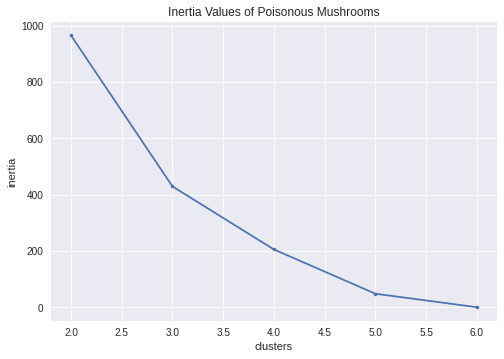

In [218]:
# Generate inertia values for poisonous mushrooms.
# Create an empty list of inertias to store values.
inertias_p = []

# Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,7):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_p)  
    inertias_p.append(kmeans.inertia_)

# Visualize scores
plt.plot(range(2,7), inertias_p, marker = '.')
plt.title('Inertia Values of Poisonous Mushrooms')
plt.xlabel('clusters')
plt.ylabel('inertia')

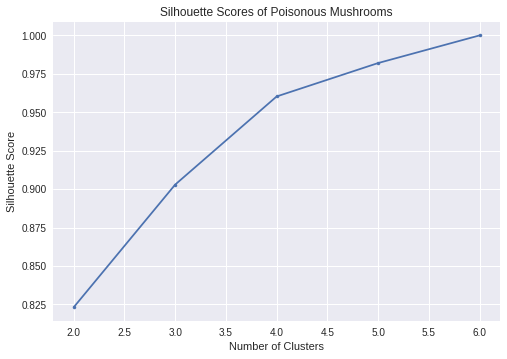

In [219]:
# Visualize different silhouette scores for poisonous mushrooms.
# Save silhouette scores for various cluster numbers in list
silhouette_scores_p = []
for i in range(2, 7):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_p)
  silhouette_scores_p.append(silhouette_score(scaled_p, kmeans.labels_))
  
# Visualize scores
plt.plot(range(2, 7), silhouette_scores_p, marker = '.')
plt.title('Silhouette Scores of Poisonous Mushrooms')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

- Based on the inertia and silhouette score lineplots, the number of clusters that would give us the best representation of poisonous mushroom clusters would be 3.
- We will use KMeans using n_clusters value of 3 and a random state value of 42 to visualize this data.

In [220]:
# Use KMeans clustering of poisonous mushrooms using the aforementioned values.
kmeans_p = KMeans(n_clusters = 3, random_state = 42)
kmeans_p.fit(scaled_p)
scaled_p['cluster'] = kmeans_p.labels_

In [224]:
# Group the dataframe by cluster and aggregate by sum of values.
# Add as_index=False to groupby argument: clusters are a column, not the index.
cluster_groups_p = scaled_p.groupby('cluster', as_index=False).sum()
cluster_groups_p

,cluster,0,1,2,3,4,5,6
0,0,0.0,224.0,224.0,0.0,0.0,0.0,448.0
1,1,1584.0,0.0,0.0,72.0,36.0,1692.0,0.0
2,2,0.0,0.0,0.0,0.0,1776.0,0.0,1776.0


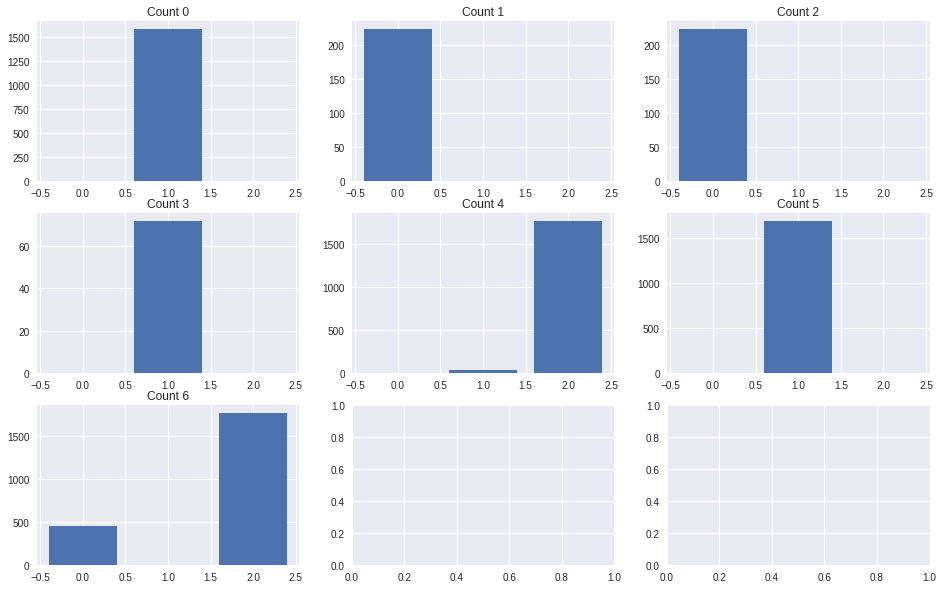

In [232]:
# Visualize counts for poisonous mushroom features.
fig, axes = plt.subplots(3,3, figsize = (16, 10))
# fig is an array of dimensions 3,3.  axes.ravel() will flatten it to 9,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure.
# We will skip the 'cluster' column here.
for i, col in enumerate(cluster_groups_p.columns[1:]):
  axes[i].bar(cluster_groups_p['cluster'], cluster_groups_p[col])
  axes[i].set_title(f'Count {col}')

- I cannot seem to find a way to get the column names onto the charts, but I will figure this out later.
- However, based on how unevenly distributed the column values are per plot, it seems like each cluster is almost clearly defined by certain sets of features that pair together extremely well.

## Edible Mushrooms

In [226]:
# Get the 2 columns of interest from the edible subset.
# Then transform the columns of interest.
modified_e = edible_df2[['veil-color', 'stalk-color-above-ring']]
scaled_e = pd.DataFrame(preprocessor.fit_transform(modified_e))
scaled_e.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0, 0.5, 'inertia')

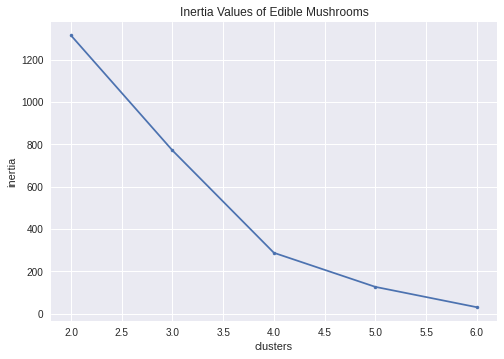

In [227]:
# Generate inertia values for edible mushrooms.
# Create an empty list of inertias to store values.
inertias_e = []

# Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,7):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_e)  
    inertias_e.append(kmeans.inertia_)

# Visualize scores
plt.plot(range(2,7), inertias_e, marker = '.')
plt.title('Inertia Values of Edible Mushrooms')
plt.xlabel('clusters')
plt.ylabel('inertia')

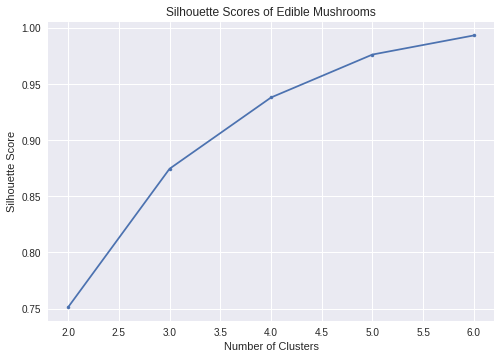

In [228]:
# Visualize different silhouette scores for edible mushrooms.
# Save silhouette scores for various cluster numbers in list
silhouette_scores_e = []
for i in range(2, 7):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_e)
  silhouette_scores_e.append(silhouette_score(scaled_e, kmeans.labels_))
  
# Visualize scores
plt.plot(range(2, 7), silhouette_scores_e, marker = '.')
plt.title('Silhouette Scores of Edible Mushrooms')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

- Based on the inertia and silhouette score lineplots, the number of clusters that would give us the best representation of edible mushroom clusters would be 4.
- We will use KMeans using n_clusters value of 4 and a random state value of 42 to visualize this data.

In [229]:
# Use KMeans clustering of edible mushrooms using the aforementioned values.
kmeans_e = KMeans(n_clusters = 4, random_state = 42)
kmeans_e.fit(scaled_e)
scaled_e['cluster'] = kmeans_e.labels_

In [230]:
# Group the dataframe by cluster and aggregate by sum of values.
# Add as_index=False to groupby argument: clusters are a column, not the index.
cluster_groups_e = scaled_e.groupby('cluster', as_index=False).sum()
cluster_groups_e

,cluster,0,1,2,3,4,5,6,7,8
0,0,0.0,0.0,688.0,96.0,576.0,16.0,0.0,0.0,0.0
1,1,0.0,0.0,2752.0,0.0,0.0,0.0,0.0,0.0,2752.0
2,2,0.0,0.0,576.0,0.0,0.0,0.0,0.0,576.0,0.0
3,3,96.0,96.0,0.0,0.0,0.0,0.0,192.0,0.0,0.0


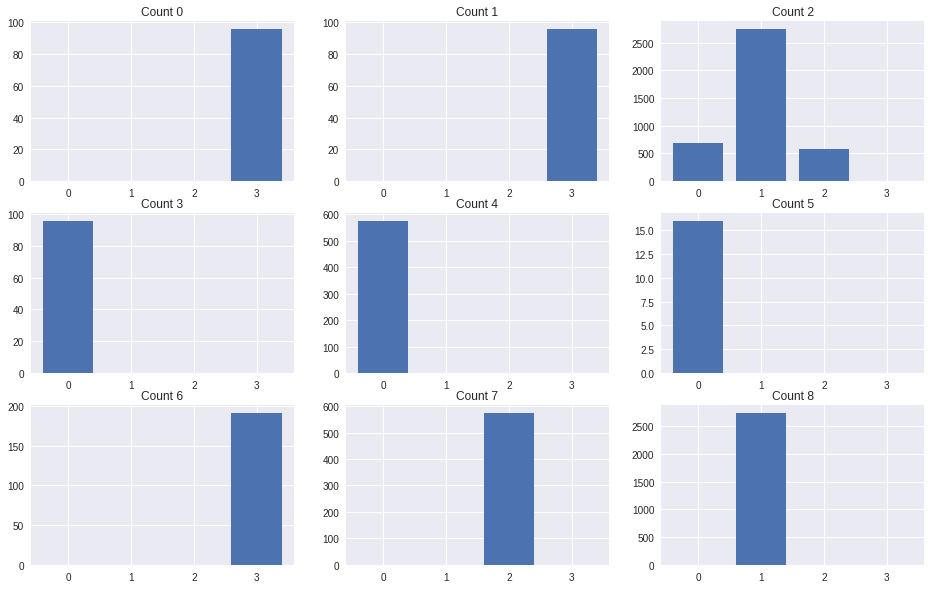

In [234]:
# Visualize counts for edible mushroom features.
fig, axes = plt.subplots(3,3, figsize = (16, 10))
# fig is an array of dimensions 3,3.  axes.ravel() will flatten it to 9,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure.
# We will skip the 'cluster' column here.
for i, col in enumerate(cluster_groups_e.columns[1:]):
  axes[i].bar(cluster_groups_e['cluster'], cluster_groups_e[col])
  axes[i].set_title(f'Count {col}')

- Just like the poisonous mushroom subset, I also cannot seem to find a way to get the column names onto the charts.
- However, based on how unevenly distributed the column values are per plot, it also seems like each cluster is almost clearly defined by certain sets of features that pair together extremely well, just like the poisonous mushroom subset.